In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
index = ['Сбербанк','Газпром','Лукойл','Роснефть','Татнефть']
years = ['2015','2016','2017','2018','2019']
data = [[] for i in range(len(index))]
for i in range(len(years)):
  for j in index: #добавляет в data выборку i-года, j-компании
    data[i].append(np.log(pd.read_csv('Datasets/' + j+years[i]+'.csv',sep=';')['<CLOSE>']) - np.log(pd.read_csv('Datasets/' + j+years[i]+'.csv',sep=';')['<OPEN>']) )

## Предварительный анализ данных

In [ ]:
df_tickers = pd.DataFrame({'Компания':index,'Тикер':tickers})

In [ ]:
df_tickers

,Компания,Тикер
0,Сбербанк,SBER
1,Газпром,GAZP
2,Лукойл,LKOH
3,Роснефть,ROSN
4,Татнефть,TATN


In [ ]:
def quantity(index, year):#расчет кол-ва пятиминуток для конкретного года
  return list(map(lambda x: len(pd.read_csv('/content/drive/MyDrive/Курсовая/Datasets/'+x+year+'.csv',sep=';')['<CLOSE>']), index))
def flat_map(data):
  x = []
  for i in range(len(data)):
    for j in range(len(data[i])):
      x.append(data[i][j])
  return np.array(x)

In [ ]:
df_quantity = pd.DataFrame(index = index, columns = years)
for i in years:
  df_quantity[i] = quantity(index,i)

In [ ]:
df_quantity

,2015,2016,2017,2018,2019
Сбербанк,26221,26459,26451,26661,26460
Газпром,26220,26456,26451,26661,26460
Лукойл,26219,26451,26451,26660,26460
Роснефть,26213,26450,26443,26649,26459
Татнефть,26118,26328,26353,26616,26437


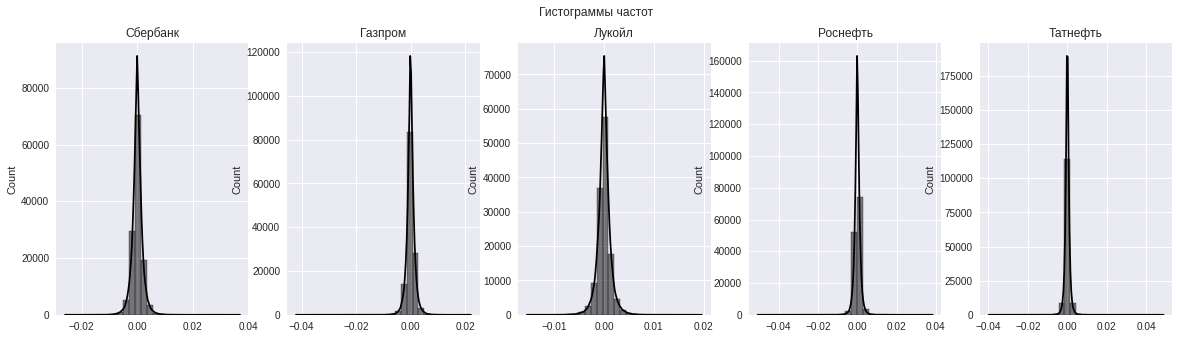

In [ ]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1,5, figsize=(20,5))
fig.suptitle('Гистограммы частот')
for i in range(len(index)):
  sns.histplot(flat_map(data[:][i]),bins=30,kde = True,ax=axes[i],stat = 'count', color='black')
  axes[i].set_title(index[i])

In [ ]:
df_corr = pd.DataFrame(data = np.transpose([flat_map(data[:][0])[:130000],
                                            flat_map(data[:][1])[:130000],
                                            flat_map(data[:][2])[:130000],
                                            flat_map(data[:][3])[:130000],
                                            flat_map(data[:][4])[:130000]]), columns = index).corr()

In [ ]:
df_corr

,Сбербанк,Газпром,Лукойл,Роснефть,Татнефть
Сбербанк,1.000000,-0.004797,0.000203,0.000659,-0.001130
Газпром,-0.004797,1.000000,0.000463,-0.002475,0.004818
Лукойл,0.000203,0.000463,1.000000,0.002381,-0.000548
Роснефть,0.000659,-0.002475,0.002381,1.000000,-0.003878
Татнефть,-0.001130,0.004818,-0.000548,-0.003878,1.000000


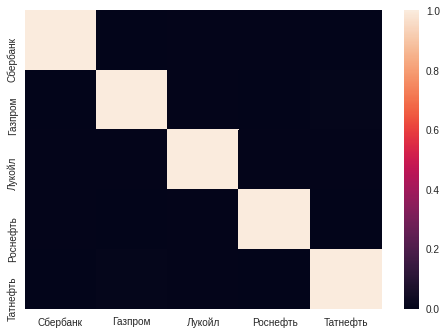

In [ ]:
sns.heatmap(df_corr)

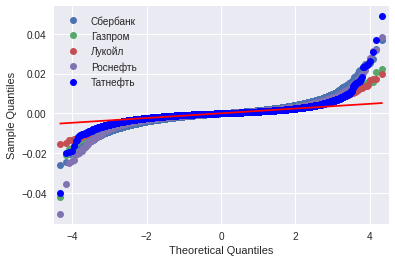

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i in range(len(index)):
  qqplot(flat_map(data[:][i]),  ax =ax, line='s',label = index[i])
for i in range(0,len(index)-1):
  ax.get_lines()[i+1].remove()
  ax.get_lines()[i].set_markerfacecolor(f'C{i}')
plt.legend()

## Проверка реальных данных

In [ ]:
'''n = [30, 50,100,250, 500,750, 1000]
df_test = pd.DataFrame(index = index)
def f(data, n):#Считает для выборки объема n долю подтверждений нулевой гипотезы
  count = len(list(filter(lambda x: x>1e-5,map(lambda x: stats.shapiro(x)[1],np.random.choice(data, (25,n),replace=False)))))
  return  str(round(count*100/25,2)) + '%'
for i in n:
  df_test[f'n = {i}'] = list(map(lambda x: f(x, i),data[0]))
df_test'''

"n = [30, 50,100,250, 500,750, 1000]\ndf_test = pd.DataFrame(index = index)\ndef f(data, n):#Считает для выборки объема n долю подтверждений нулевой гипотезы\n  count = len(list(filter(lambda x: x>1e-5,map(lambda x: stats.shapiro(x)[1],np.random.choice(data, (25,n),replace=False)))))\n  return  str(round(count*100/25,2)) + '%'\nfor i in n:\n  df_test[f'n = {i}'] = list(map(lambda x: f(x, i),data[0]))\ndf_test"

In [ ]:
def f1(data):
  return list(map(lambda x: stats.normaltest(x)[1], data))
df_normal = pd.DataFrame(index =[1,2,3,4,5])
for i in range(5):
  df_normal[i+1] = f1(np.random.choice(stats.norm(i/2,2*i+1).rvs(130000),(5,20000),replace=False))
df_normal.corr()

,1,2,3,4,5
1,1.000000,0.237923,-0.820357,0.858394,0.571969
2,0.237923,1.000000,-0.372787,-0.284652,-0.353862
3,-0.820357,-0.372787,1.000000,-0.561890,-0.078657
4,0.858394,-0.284652,-0.561890,1.000000,0.784157
5,0.571969,-0.353862,-0.078657,0.784157,1.000000


In [ ]:
df_test = pd.DataFrame(index = index)
for i in range(len(years)):
  df_test[years[i]] = f1(data[i])
df_test

,2015,2016,2017,2018,2019
Сбербанк,0.0,0.0,0.0,0.0,0.0
Газпром,0.0,0.0,0.0,0.0,0.0
Лукойл,0.0,0.0,0.0,0.0,0.0
Роснефть,0.0,0.0,0.0,0.0,0.0
Татнефть,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''index = ['Сбербанк','Газпром','Лукойл','Роснефть','Татнефть']
years = ['2015','2016','2017','2018','2019']
data = [[] for i in range(len(index))]
for i in range(len(years)):
  for j in index: #добавляет в data выборку i-года, j-компании
    data[i].append(np.log(pd.read_csv('Datasets/' + j+years[i]+'.csv',sep=';')['<CLOSE>']) - np.log(pd.read_csv('Datasets/' + j+years[i]+'.csv',sep=';')['<OPEN>']) )'''

SyntaxError: ignored